In [1]:
import numpy as np
from triangular_transport.flows.methods.utils import UnitGaussianNormalizer
from scipy.stats import norm, chi2
import h5py

In [2]:
def read_data_h5(path="data.h5"):
    with h5py.File(path, "r") as f:
        targets = f["/target"][...]
        data = f["/data"][...]
    return targets, data

In [3]:
ys = np.load("training_dataset/solutions_grid_delta.npy")
targets, yobs = read_data_h5()

In [4]:
ys_mean = np.mean(ys, axis=0)
ys_std = np.std(ys, axis=0)

ys_98 = norm.ppf(0.98, loc=ys_mean, scale=ys_std)
ys_68 = norm.ppf(0.68, loc=ys_mean, scale=ys_std)

cov = np.cov(ys, rowvar=False)
inv_cov = np.linalg.inv(cov)

def mahal_square(y):
    diff = y - ys_mean
    return diff.T @ inv_cov @ diff

mahal = mahal_square(yobs)

In [5]:
p = chi2.cdf(mahal, df=ys.shape[1])
p

np.float64(0.8501599448129048)

The variable $p$ is basically saying that $y_{\mathrm{obs}}$ lies on an ellipsoid that contains a fraction $p$ of the Gaussian mass. So it's really similar to a quantile, though it isn't quite the same. It is the exact Gaussian quantile of the Mahalanobis distance. The reason why this is hard to interpret is because the y's are multivariate so it's impossible to get a unique notion of quantile.

In [6]:
diff = ys - ys_mean
mahal_all = np.sum(diff @ inv_cov * diff, axis=1)

In [14]:
mahal_all

array([114.66944964,  84.38553397,  73.21988768, ...,  94.58218342,
       103.43076744,  89.75873946], shape=(125000,))

In [7]:
q98 = np.quantile(mahal_all, 0.98)
idx_closest = np.argmin(np.abs(mahal_all - q98))
y_98 = ys[idx_closest]
y_98

array([0.07550486, 0.07434839, 0.0733999 , 0.07435156, 0.0746158 ,
       0.07471459, 0.07420093, 0.07299112, 0.07272377, 0.07315236,
       0.21279691, 0.21187083, 0.21333539, 0.21486062, 0.2150751 ,
       0.21465419, 0.21412714, 0.21373279, 0.21415745, 0.2150088 ,
       0.33897259, 0.33998645, 0.3415815 , 0.34159089, 0.34174503,
       0.34092612, 0.34043084, 0.34131264, 0.34407856, 0.34519817,
       0.4563399 , 0.4571698 , 0.45755351, 0.45774189, 0.45874082,
       0.45815771, 0.45658872, 0.45693057, 0.45728721, 0.45833377,
       0.56420405, 0.56426266, 0.56385503, 0.5647712 , 0.56634108,
       0.56732625, 0.56586707, 0.56274715, 0.56005272, 0.55874132,
       0.65798134, 0.65760785, 0.65849768, 0.66102324, 0.66294856,
       0.66460024, 0.66412648, 0.66073191, 0.65670552, 0.65421733,
       0.74410571, 0.74362536, 0.74444961, 0.7467645 , 0.75009951,
       0.75290926, 0.75394374, 0.75240504, 0.74982908, 0.74827922,
       0.82486656, 0.82528317, 0.82619393, 0.82782884, 0.83066

In [15]:
np.save("data_98.npy", y_98)

Do the same for the median below, following the exact steps from the above

In [13]:
q50 = np.quantile(mahal_all, 0.50)
idx_closest = np.argmin(np.abs(mahal_all - q50))
y_50 = ys[idx_closest]
y_50

array([0.07410991, 0.07609084, 0.07650706, 0.07537216, 0.0742541 ,
       0.07230986, 0.07116938, 0.071     , 0.07116237, 0.07095019,
       0.21609606, 0.21871847, 0.21891154, 0.2166439 , 0.21317089,
       0.20951455, 0.20824882, 0.20759305, 0.20729821, 0.20719187,
       0.34862107, 0.34918441, 0.34954582, 0.34688781, 0.34324367,
       0.34076332, 0.338226  , 0.33638439, 0.33566027, 0.3364829 ,
       0.46884983, 0.46839145, 0.46893448, 0.46835505, 0.46489794,
       0.4611367 , 0.45713472, 0.45409036, 0.45368663, 0.45377968,
       0.57822359, 0.5768206 , 0.57592869, 0.57569268, 0.57419588,
       0.57148364, 0.56797326, 0.56483052, 0.56256963, 0.56132022,
       0.67664226, 0.67585186, 0.67404616, 0.6721923 , 0.67151591,
       0.67070652, 0.66833597, 0.66583679, 0.66391095, 0.66232018,
       0.7673498 , 0.76644611, 0.76423557, 0.76146354, 0.76002048,
       0.75904232, 0.75768358, 0.75555624, 0.75303494, 0.75134382,
       0.84941493, 0.84852311, 0.84623578, 0.84346961, 0.83992

In [16]:
np.save("data_50.npy", y_50)

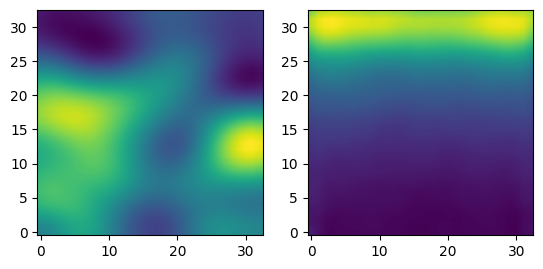

In [3]:
import numpy as np
import matplotlib.pyplot as plt

u_samps0 = np.load("mcmc_98/chain_00/hmala_samples.npy")
u_mean0 = np.mean(u_samps0, axis=0)
u_var0 = np.var(u_samps0, axis=0)
fig, ax = plt.subplots(1, 2)

ax[0].imshow(u_mean0.reshape(33, 33), origin="lower", interpolation="bilinear")
ax[1].imshow(u_var0.reshape(33, 33), origin="lower", interpolation="bilinear")

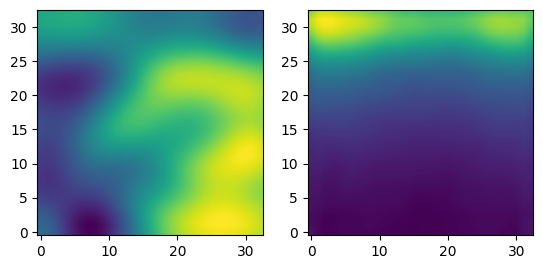

In [1]:
import numpy as np
import matplotlib.pyplot as plt

u_samps0 = np.load("mcmc_median/chain_00/hmala_samples.npy")
u_mean0 = np.mean(u_samps0, axis=0)
u_var0 = np.var(u_samps0, axis=0)
fig, ax = plt.subplots(1, 2)

ax[0].imshow(u_mean0.reshape(33, 33), origin="lower", interpolation="bilinear")
ax[1].imshow(u_var0.reshape(33, 33), origin="lower", interpolation="bilinear")

In [1]:
import numpy as np
B = np.array([[3, 2],
             [1, 4]])
cov = np.array([[0.0004, 0.001],
                [0.001, 0.0025]])
B @ cov @ B.T

array([[0.0256, 0.0352],
       [0.0352, 0.0484]])